## PVT <a class="anchor" id="pvt"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
cr = pd.read_csv('/Volumes/schnyer/Megan/Wearables/results/cr_cosinor_df.csv', skiprows=1)
cr.columns = ['subject', 'actmin_7', 'amp_7', 'alpha_7', 'beta_7', 'phi_7', 'device']
cr['subject'] = cr['subject'].str.slice(2, -3)
np = pd.read_csv('/Volumes/schnyer/Megan/Wearables/results/cr_nonpar_df.csv')
np['subject'] = np['subject'].astype(str)
rc = pd.read_csv('/Volumes/schnyer/Megan/Wearables/data/survey/demographic/WearableAssessment-Validation_DATA_2021-01-29_1236.csv')
rc = rc[rc['redcap_event_name'] == 'online_eligibility_arm_1']
rc['subject'] = rc['record_id']
rc['subject'][rc['age_group'] == 1.0] = '1' + rc['record_id'].astype(str).str.pad(4, fillchar='0')
rc['subject'][rc['age_group'] != 1.0] = '2' + rc['record_id'].astype(str).str.pad(4, fillchar='0')
rc

df = pd.merge(rc, cr[cr['device'] == 'Actiwatch'], on='subject', how='outer')
df = pd.merge(df, cr[cr['device'] == 'Fitbit'], on='subject', suffixes=('', '_fit'))
df = pd.merge(df, np[np['device'] == 'Actiwatch'], on='subject', how='outer')
df = pd.merge(df, np[np['device'] == 'Fitbit'], on='subject', suffixes=('', '_fit'))
df = df.drop_duplicates(subset='subject', keep='first').drop(columns = ['device_y', 'device', 'selected_devices___1', 'selected_devices___2', 'selected_devices___3', 'selected_devices___4', 'redcap_event_name', 'record_id'])
df.to_csv('/Volumes/schnyer/Megan/Wearables/dataset_2021-11-04.csv')
df

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_86064/3459759866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['subject'][rc['age_group'] == 1.0] = '1' + rc['record_id'].astype(str).str.pad(4, fillchar='0')
/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_86064/3459759866.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['subject'][rc['age_group'] != 1.0] = '2' + rc['record_id'].astype(str).str.pad(4, fillchar='0')


,age_group,handedness,gender,ethnicity___1,ethnicity___2,ethnicity___3,ethnicity___4,ethnicity___5,ethnicity___6,global_psqi,...,L5,M10_start,M10,IS_fit,IV_fit,RA_fit,L5_start_fit,L5_fit,M10_start_fit,M10_fit
0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.002991,"[(18, 29, 0)]",0.059239,0.210442,0.164206,0.994501,"[(4, 56, 0)]",0.000261,"[(16, 37, 0)]",0.094548
1,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.000652,"[(22, 18, 0)]",0.021110,0.238561,0.076745,0.989852,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.102290
2,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,...,0.002044,"[(18, 7, 0)]",0.062699,0.318342,0.107596,0.995553,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.104364
3,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.001762,"[(20, 12, 0)]",0.027080,0.191609,0.082882,0.977252,"[(6, 1, 0)]",0.000937,"[(18, 44, 0)]",0.081403
4,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.003960,"[(22, 52, 0)]",0.028354,0.182377,0.090897,0.794133,"[(9, 18, 0)]",0.011392,"[(21, 45, 0)]",0.099281
5,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.001570,"[(22, 7, 0)]",0.023243,0.176347,0.136244,0.950282,"[(6, 1, 0)]",0.002202,"[(22, 13, 0)]",0.086375
6,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.001417,"[(23, 59, 0)]",0.044722,0.208218,0.149378,0.994747,"[(8, 43, 0)]",0.000222,"[(19, 27, 0)]",0.084381
7,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,...,0.001788,"[(20, 14, 0)]",0.038631,0.209249,0.107886,0.996291,"[(4, 48, 0)]",0.000180,"[(18, 29, 0)]",0.096920
8,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.000855,"[(23, 59, 0)]",0.035817,0.265932,0.085911,0.993353,"[(8, 7, 0)]",0.000353,"[(19, 7, 0)]",0.105987
9,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.004668,"[(17, 48, 0)]",0.041324,0.161564,0.114774,0.987378,"[(6, 7, 0)]",0.000526,"[(17, 47, 0)]",0.082852


In [109]:
cr[cr['device'] == 'Fitbit']

,subject,actmin_7,amp_7,alpha_7,beta_7,phi_7,device
1,10011,0.085566,0.621676,6.958278,6.041740,12.502249,Fitbit
3,10012,0.074178,0.598329,6.909320,5.956696,13.216577,Fitbit
5,10014,0.076620,0.604754,6.931347,5.985179,13.183611,Fitbit
7,10016,0.077278,0.610647,6.956235,6.020787,11.993785,Fitbit
9,10023,0.106759,0.614339,6.902186,5.955366,12.976970,Fitbit
11,10024,0.089697,0.615640,6.931546,6.002002,12.940139,Fitbit
13,10025,0.083252,0.606805,6.919426,5.978431,13.021859,Fitbit
15,10033,0.081083,0.618001,6.956716,6.035541,12.511843,Fitbit
17,10035,0.101586,0.611034,6.902250,5.955079,13.078318,Fitbit
19,10038,0.084099,0.618589,6.958397,6.036608,12.228871,Fitbit


In [3]:
data_dir = '/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/'

In [120]:
df = pd.read_csv('/Volumes/schnyer/Megan/Wearables/dataset_2021-11-04.csv')
df = df.set_index('subject')
df

,Unnamed: 0,age_group,handedness,gender,ethnicity___1,ethnicity___2,ethnicity___3,ethnicity___4,ethnicity___5,ethnicity___6,...,L5,M10_start,M10,IS_fit,IV_fit,RA_fit,L5_start_fit,L5_fit,M10_start_fit,M10_fit
subject,,,,,,,,,,,,,,,,,,,,,
10011,0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.002991,"[(18, 29, 0)]",0.059239,0.210442,0.164206,0.994501,"[(4, 56, 0)]",0.000261,"[(16, 37, 0)]",0.094548
10012,1,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000652,"[(22, 18, 0)]",0.021110,0.238561,0.076745,0.989852,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.102290
10014,2,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.002044,"[(18, 7, 0)]",0.062699,0.318342,0.107596,0.995553,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.104364
10016,3,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.001762,"[(20, 12, 0)]",0.027080,0.191609,0.082882,0.977252,"[(6, 1, 0)]",0.000937,"[(18, 44, 0)]",0.081403
10023,4,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.003960,"[(22, 52, 0)]",0.028354,0.182377,0.090897,0.794133,"[(9, 18, 0)]",0.011392,"[(21, 45, 0)]",0.099281
10024,5,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001570,"[(22, 7, 0)]",0.023243,0.176347,0.136244,0.950282,"[(6, 1, 0)]",0.002202,"[(22, 13, 0)]",0.086375
10025,6,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.001417,"[(23, 59, 0)]",0.044722,0.208218,0.149378,0.994747,"[(8, 43, 0)]",0.000222,"[(19, 27, 0)]",0.084381
10033,7,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.001788,"[(20, 14, 0)]",0.038631,0.209249,0.107886,0.996291,"[(4, 48, 0)]",0.000180,"[(18, 29, 0)]",0.096920
10035,8,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000855,"[(23, 59, 0)]",0.035817,0.265932,0.085911,0.993353,"[(8, 7, 0)]",0.000353,"[(19, 7, 0)]",0.105987


In [121]:
pvt = pd.read_csv(data_dir + 'PVT/pvt_results.csv').set_index('subject')
pvt

,date,location,RT,FS,NR,Group
subject,,,,,,
10011,2019-10-24,lab,0.287571,0.0,0.0,Young Adults
10012,2019-10-18,lab,0.292187,3.0,0.0,Young Adults
10014,2019-11-11,lab,0.343802,6.0,0.0,Young Adults
10023,2019-11-11,lab,0.295579,2.0,0.0,Young Adults
10024,2019-11-05,lab,0.286903,1.0,0.0,Young Adults
10025,2019-12-05,lab,0.245413,1.0,0.0,Young Adults
10033,2019-11-07,lab,0.343700,0.0,0.0,Young Adults
10035,2020-02-07,lab,0.267186,1.0,0.0,Young Adults
10038,2020-01-22,lab,0.270828,2.0,0.0,Young Adults


In [179]:
df1 = df.join(pvt, how = 'outer').reset_index()
df1['subject'] = df1['subject'].astype(str)
df1 = df1.drop_duplicates(['subject'], keep='first').drop(columns = ['Group']).set_index('subject')
df1

,Unnamed: 0,age_group,handedness,gender,ethnicity___1,ethnicity___2,ethnicity___3,ethnicity___4,ethnicity___5,ethnicity___6,...,RA_fit,L5_start_fit,L5_fit,M10_start_fit,M10_fit,date,location,RT,FS,NR
subject,,,,,,,,,,,,,,,,,,,,,
10011,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.994501,"[(4, 56, 0)]",0.000261,"[(16, 37, 0)]",0.094548,2019-10-24,lab,0.287571,0.0,0.0
10012,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.989852,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.102290,2019-10-18,lab,0.292187,3.0,0.0
10014,2.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.995553,"[(7, 19, 0)]",0.000233,"[(18, 15, 0)]",0.104364,2019-11-11,lab,0.343802,6.0,0.0
10016,3.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.977252,"[(6, 1, 0)]",0.000937,"[(18, 44, 0)]",0.081403,NaN,NaN,NaN,NaN,NaN
10023,4.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.794133,"[(9, 18, 0)]",0.011392,"[(21, 45, 0)]",0.099281,2019-11-11,lab,0.295579,2.0,0.0
10024,5.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.950282,"[(6, 1, 0)]",0.002202,"[(22, 13, 0)]",0.086375,2019-11-05,lab,0.286903,1.0,0.0
10025,6.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.994747,"[(8, 43, 0)]",0.000222,"[(19, 27, 0)]",0.084381,2019-12-05,lab,0.245413,1.0,0.0
10033,7.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.996291,"[(4, 48, 0)]",0.000180,"[(18, 29, 0)]",0.096920,2019-11-07,lab,0.343700,0.0,0.0
10035,8.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.993353,"[(8, 7, 0)]",0.000353,"[(19, 7, 0)]",0.105987,2020-02-07,lab,0.267186,1.0,0.0


In [126]:
df1[df1['RT'] > 1][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
20123,65000.000000,0.0,13.0
20125,802.881283,9.0,1.0
20129,774.142121,3.0,1.0
20131,823.081953,0.0,1.0
20157,2364.152800,14.0,2.0


In [127]:
df1[df1['FS'] > 10][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
10148,0.532984,27.0,0.0
10149,0.435698,15.0,0.0
10151,0.512348,12.0,0.0
20157,2364.152800,14.0,2.0
20168,0.527518,26.0,0.0


In [128]:
df1[df1['NR'] > 0][['RT', 'FS', 'NR']]

,RT,FS,NR
subject,,,
20123,65000.000000,0.0,13.0
20125,802.881283,9.0,1.0
20129,774.142121,3.0,1.0
20131,823.081953,0.0,1.0
20157,2364.152800,14.0,2.0


In [129]:
df1 = df1[df1['RT'] < 1]

In [153]:
from scipy.stats import zscore

df1['RT_z'] = df1.groupby(['age_group'])['RT'].transform(lambda x : zscore(x,ddof=1))
df1['FS_z'] = df1.groupby(['age_group'])['FS'].transform(lambda x : zscore(x,ddof=1))


df1['RT_z']

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


subject
10011   -0.668249
10012   -0.605954
10014    0.090524
10023   -0.560183
10024   -0.677257
10025   -1.237119
10033    0.089155
10035   -0.943324
10038   -0.894175
10045         NaN
10049         NaN
10057         NaN
10062   -0.276877
10076         NaN
10139   -0.550997
10140   -0.185403
10143    1.649320
10144    0.044100
10146    0.366345
10148    2.643330
10149    1.330555
10151         NaN
10152    0.386208
20076         NaN
20103   -0.829538
20105   -0.746744
20108   -1.307536
20113   -1.034541
20115    1.069744
20120   -0.328610
20122    0.091136
20142    0.011705
20154    0.181911
20155   -0.568616
20163    0.695300
20168    3.007648
20176         NaN
20178    0.235852
20180   -0.128201
20181   -0.529039
20182   -0.389646
20184    0.569175
Name: RT_z, dtype: float64

<AxesSubplot:xlabel='amp_7_fit', ylabel='RT_z'>

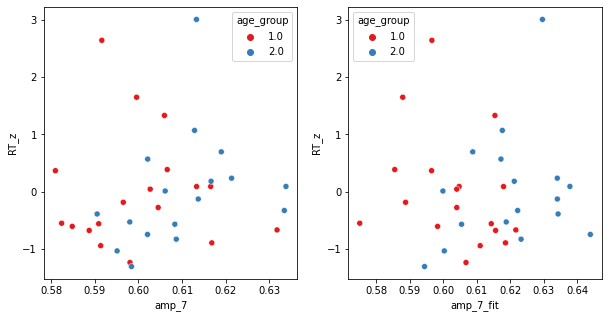

In [143]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'amp_7', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'amp_7_fit', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='phi_7_fit', ylabel='RT_z'>

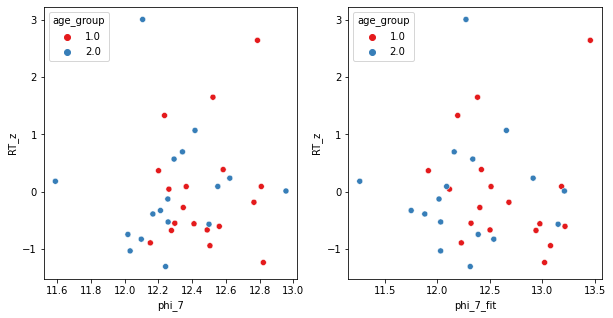

In [148]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'phi_7', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'phi_7_fit', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')



<AxesSubplot:xlabel='IS_fit', ylabel='RT_z'>

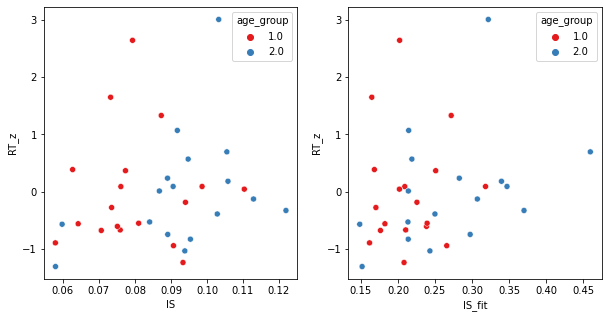

In [150]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'IS', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'IS_fit', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')


<AxesSubplot:xlabel='IV_fit', ylabel='RT_z'>

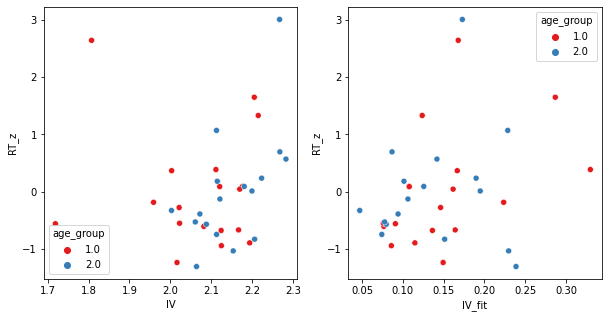

In [151]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'IV', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'IV_fit', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')



<AxesSubplot:xlabel='RA_fit', ylabel='RT_z'>

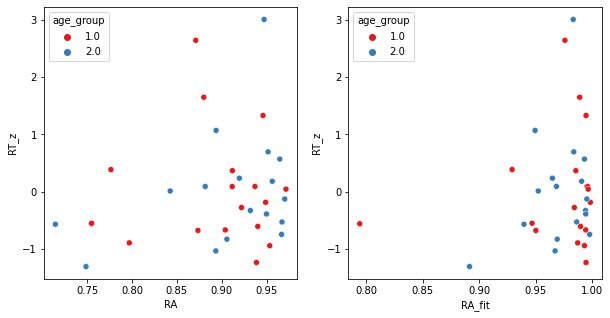

In [152]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(ax = ax[0], x = 'RA', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')
sns.scatterplot(ax = ax[1], x = 'RA_fit', y = 'RT_z', hue = 'age_group', ci=95, data = df1, palette = 'Set1')



In [243]:
df1.to_csv('/Volumes/schnyer/Megan/Wearables/dataset_2021-11-04.csv')

